# 1. Import des bibliothèques

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

2025-10-10 10:21:32.577881: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr

Found 5336 images belonging to 2 classes.
Found 1334 images belonging to 2 classes.


W0000 00:00:1760091771.443192    1976 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8626 - loss: 0.3145
Epoch 1: val_loss improved from None to 0.11396, saving model to photo_classifier_best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9157 - loss: 0.1939 - val_accuracy: 0.9543 - val_loss: 0.1140
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9605 - loss: 0.1018
Epoch 2: val_loss improved from 0.11396 to 0.04273, saving model to photo_classifier_best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.9593 - loss: 0.1053 - val_accuracy: 0.9858 - val_loss: 0.0427
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9614 - loss: 0.1009
Epoch 3: val_loss did not improve from 0.04273
167/167 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9595 - loss: 0.1017 - val_accuracy: 0.9618 - val_loss: 0.0947
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9701 - loss: 0.0853
Epoch 4: val_loss did not improve from 0.04273
167/167 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.9693 - loss: 0.0827 - val_accuracy: 0.9685 - val_loss: 0.0789
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9705 - loss: 0.0768
Epoch 5: val_loss did not improve from 0.04273
167/167 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9710 - loss: 0.0751 - val_accuracy: 0.9798 - val_loss: 0.0569
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


42/42 ━━━━━━━━━━━━━━━━━━━━ 29s 615ms/step

Seuil optimal trouvé : 0.0875
Matrice de confusion sauvegardée dans 'confusion_matrix_optimal.png'
Courbe ROC sauvegardée dans 'roc_curve.png'


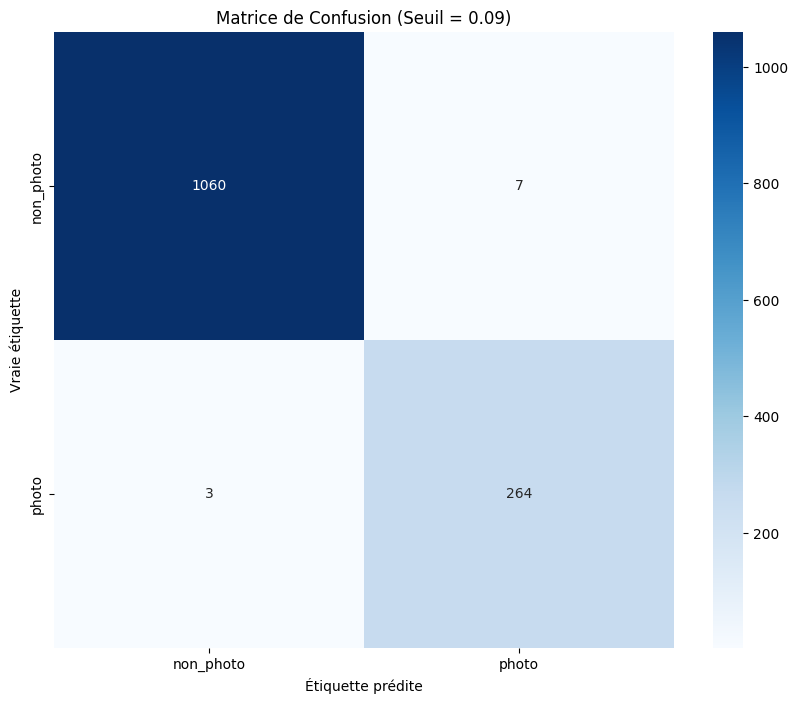

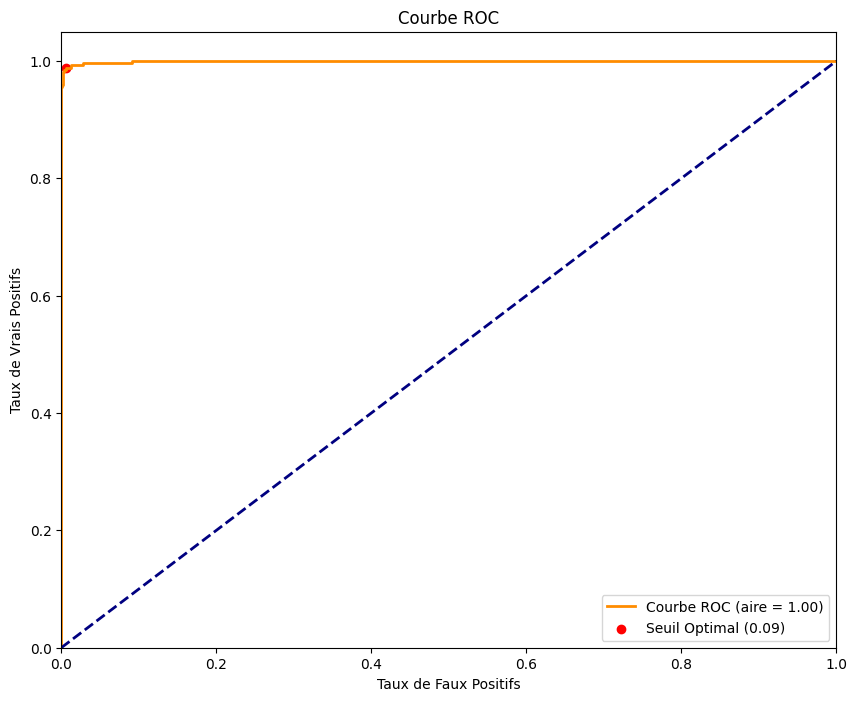

In [2]:
# --- Constantes et Configuration ---
BASE_DIR = r"training_data"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
MODEL_PATH = 'photo_classifier_best_model.h5' # Sauvegarder le meilleur modèle ici

def get_data_generators():
    """
    Crée les générateurs de données pour l'entraînement et la validation.
    - Le générateur d'entraînement utilise l'augmentation de données.
    - Le générateur de validation ne fait que redimensionner les images.
    """
    # Générateur pour l'entraînement (avec augmentation)
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Générateur pour la validation (sans augmentation)
    validation_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        BASE_DIR,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='training'
    )

    validation_generator = validation_datagen.flow_from_directory(
        BASE_DIR,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation',
        shuffle=False  # Important pour l'évaluation
    )
    
    return train_generator, validation_generator

def build_model():
    """Crée le modèle de classification en utilisant MobileNetV2 comme base."""
    base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
    base_model.trainable = False

    inputs = Input(shape=IMG_SIZE + (3,))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

def train_model(model, train_generator, validation_generator):
    """Entraîne le modèle avec les callbacks EarlyStopping et ModelCheckpoint."""
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True),
        ModelCheckpoint(filepath=MODEL_PATH, monitor='val_loss', save_best_only=True, verbose=1)
    ]

    history = model.fit(
        train_generator,
        epochs=10, # On peut mettre plus d'époques, EarlyStopping s'en chargera
        validation_data=validation_generator,
        callbacks=callbacks
    )
    return history

def evaluate_and_find_threshold(validation_generator):
    """Charge le meilleur modèle, évalue et trouve le seuil optimal."""
    model = load_model(MODEL_PATH)
    
    # Prédictions
    y_pred_proba = model.predict(validation_generator).ravel()
    y_true = validation_generator.classes

    # Calcul de la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Trouver le seuil optimal (point le plus proche du coin supérieur gauche)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print(f"\nSeuil optimal trouvé : {optimal_threshold:.4f}")

    # Évaluation avec le seuil optimal
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred_optimal)
    class_labels = list(validation_generator.class_indices.keys())

    # Affichage de la matrice de confusion
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Matrice de Confusion (Seuil = {optimal_threshold:.2f})')
    plt.ylabel('Vraie étiquette')
    plt.xlabel('Étiquette prédite')
    plt.savefig("confusion_matrix_optimal.png")
    print("Matrice de confusion sauvegardée dans 'confusion_matrix_optimal.png'")

    # Affichage de la courbe ROC
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (aire = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Seuil Optimal ({optimal_threshold:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title('Courbe ROC')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    print("Courbe ROC sauvegardée dans 'roc_curve.png'")


if __name__ == "__main__":
    # 1. Préparer les données
    train_gen, val_gen = get_data_generators()

    # 2. Construire le modèle
    model = build_model()
    model.summary()

    # 3. Entraîner le modèle
    train_model(model, train_gen, val_gen)

    # 4. Évaluer et trouver le meilleur seuil avec le meilleur modèle sauvegardé
    evaluate_and_find_threshold(val_gen)


# Après Finetuning et amélioration


2025-10-10 11:36:38.201157: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr

Found 5336 images belonging to 2 classes.
Found 1334 images belonging to 2 classes.


W0000 00:00:1760096207.543696     700 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


--- Étape 1: Entraînement de la tête de classification ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8788 - loss: 0.2698
Epoch 1: val_loss improved from None to 0.05072, saving model to photo_classifier_best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.9151 - loss: 0.1984 - val_accuracy: 0.9850 - val_loss: 0.0507 - learning_rate: 0.0010
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9532 - loss: 0.1231
Epoch 2: val_loss did not improve from 0.05072
167/167 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9496 - loss: 0.1276 - val_accuracy: 0.9693 - val_loss: 0.0745 - learning_rate: 0.0010
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9531 - loss: 0.1274
Epoch 3: val_loss improved from 0.05072 to 0.04154, saving model to photo_classifier_best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9552 - loss: 0.1155 - val_accuracy: 0.9880 - val_loss: 0.0415 - learning_rate: 0.0010
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9652 - loss: 0.0927
Epoch 4: val_loss improved from 0.04154 to 0.03720, saving model to photo_classifier_best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.9623 - loss: 0.1013 - val_accuracy: 0.9880 - val_loss: 0.0372 - learning_rate: 0.0010
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9586 - loss: 0.1057
Epoch 5: val_loss did not improve from 0.03720
167/167 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.9629 - loss: 0.0970 - val_accuracy: 0.9835 - val_loss: 0.0539 - learning_rate: 0.0010
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9599 - loss: 0.0975
Epoch 6: val_loss did not improve from 0.03720

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
167/167 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9644 - loss: 0.0930 - val_accuracy: 0.9805 - val_loss: 0.0543 - learning_rate: 0.0010
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9706 - loss: 0.0818
Epoch 7: val_loss did not improve from 0.03720
167/167 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9747 - loss: 0.0731 - val_accuracy: 0.9850 -

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 2,025,537 (7.73 MB)

 Non-trainable params: 396,544 (1.51 MB)

Epoch 10/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6730 - loss: 0.9069
Epoch 10: val_loss did not improve from 0.03720
167/167 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.7804 - loss: 0.5732 - val_accuracy: 0.8643 - val_loss: 0.3437 - learning_rate: 1.0000e-05
Epoch 11/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9415 - loss: 0.1623
Epoch 11: val_loss did not improve from 0.03720

Epoch 11: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.
167/167 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.9494 - loss: 0.1348 - val_accuracy: 0.8793 - val_loss: 0.3067 - learning_rate: 1.0000e-05
Epoch 12/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9541 - loss: 0.1217
Epoch 12: val_loss did not improve from 0.03720
167/167 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.9584 - loss: 0.1129 - val_accuracy: 0.9235 - val_loss: 0.1654 - learning_rate: 2.0000e-06
Epoch 13/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9607 - loss: 0.

42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 795ms/step

Seuil optimal trouvé : 0.1023
Matrice de confusion sauvegardée dans 'confusion_matrix_optimal.png'
Courbe ROC sauvegardée dans 'roc_curve.png'


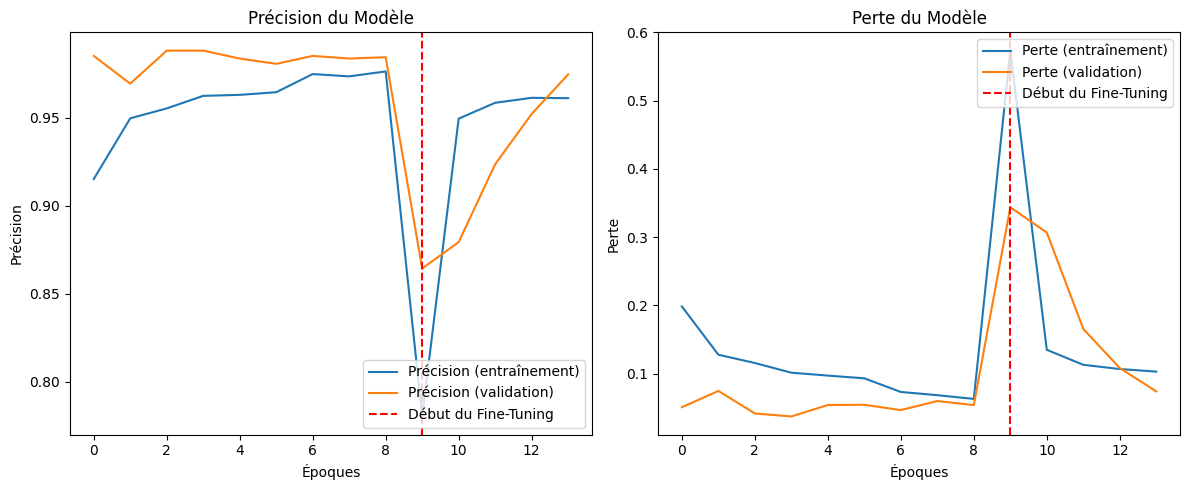

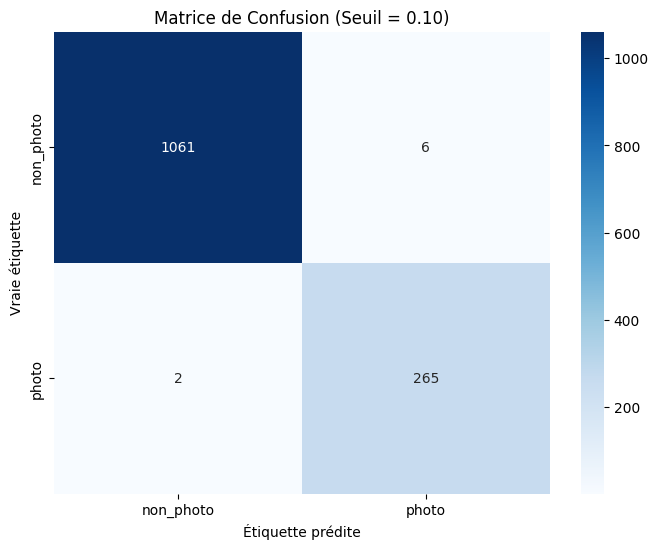

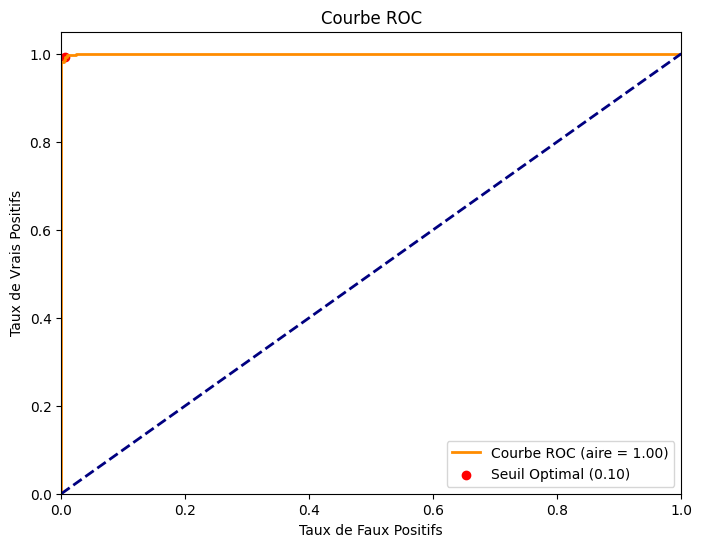

In [1]:

'''
Ce script analyse les problèmes des notebooks `training.ipynb` et `binary_prediction.ipynb`
et propose une version améliorée et structurée du code pour l'entraînement et l'évaluation
du classifieur binaire.

Cette version intègre des techniques avancées comme le fine-tuning et la planification
du taux d'apprentissage pour améliorer les performances du modèle.
'''

# 1. Analyse du Modèle et Améliorations Proposées
# -------------------------------------------------

# 1.1. Augmentation de Données sur l'Ensemble de Validation
# Problème: Le même générateur de données avec augmentation est utilisé pour l'entraînement et la validation.
# Solution: Utiliser un générateur distinct pour la validation, avec uniquement la mise à l'échelle (rescale). (Implémenté)

# 1.2. Seuil de Décision Hardcodé
# Problème: Le seuil de classification est fixé à 0.5, ce qui n'est pas optimal.
# Solution: Calculer le seuil optimal après l'entraînement en utilisant la courbe ROC. (Implémenté)

# 1.3. Manque de Contrôle de l'Entraînement
# Problème: L'entraînement sur un nombre fixe d'époques peut mener au sur-apprentissage.
# Solution: Intégrer `EarlyStopping` et `ModelCheckpoint` pour sauvegarder le meilleur modèle. (Implémenté)

# 1.4. Structure du Code
# Problème: Logique dispersée dans plusieurs notebooks.
# Solution: Centraliser le code dans un script Python unique et modulaire. (Implémenté)

# 1.5. Visualisation de l'Entraînement
# Problème: Aucune visualisation des courbes de perte et de précision.
# Solution: Ajouter une fonction pour tracer et sauvegarder les graphiques de l'historique d'entraînement. (Nouveau)

# 1.6. Optimisation de l'Entraînement
# Problème: Le modèle de base est entièrement gelé (transfer learning simple).
# Solution: Implémenter une stratégie de fine-tuning en deux étapes et un scheduler de taux d'apprentissage. (Nouveau)


# 2. Code Python Amélioré
# ------------------------

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# --- Constantes et Configuration ---
BASE_DIR = r"training_data"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
MODEL_PATH = 'photo_classifier_best_model.h5'
HISTORY_PLOT_PATH = 'training_history.png'
CONFUSION_MATRIX_PATH = 'confusion_matrix_optimal.png'
ROC_CURVE_PATH = 'roc_curve.png'

# Hyperparamètres pour l'entraînement
INITIAL_EPOCHS = 10
FINE_TUNE_EPOCHS = 10
INITIAL_LR = 1e-3
FINE_TUNE_LR = 1e-5
FINE_TUNE_AT_LAYER = 100 # Dégeler à partir de la 100ème couche de MobileNetV2

def get_data_generators():
    """
    Crée les générateurs de données pour l'entraînement et la validation.
    """
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = train_datagen.flow_from_directory(
        BASE_DIR,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='training'
    )

    validation_generator = validation_datagen.flow_from_directory(
        BASE_DIR,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation',
        shuffle=False
    )
    
    return train_generator, validation_generator

def build_model():
    """Crée le modèle de classification en utilisant MobileNetV2 comme base."""
    base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
    base_model.trainable = False # Geler la base initialement

    inputs = Input(shape=IMG_SIZE + (3,))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x) # Augmentation du dropout pour régulariser
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model, base_model

def plot_training_history(history, fine_tune_initial_epoch):
    """Trace et sauvegarde les courbes de précision et de perte."""
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Précision (entraînement)')
    plt.plot(val_acc, label='Précision (validation)')
    if fine_tune_initial_epoch > 0:
        plt.axvline(fine_tune_initial_epoch -1, color='red', linestyle='--', label='Début du Fine-Tuning')
    plt.legend(loc='lower right')
    plt.title('Précision du Modèle')
    plt.xlabel('Époques')
    plt.ylabel('Précision')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Perte (entraînement)')
    plt.plot(val_loss, label='Perte (validation)')
    if fine_tune_initial_epoch > 0:
        plt.axvline(fine_tune_initial_epoch-1, color='red', linestyle='--', label='Début du Fine-Tuning')
    plt.legend(loc='upper right')
    plt.title('Perte du Modèle')
    plt.xlabel('Époques')
    plt.ylabel('Perte')

    plt.tight_layout()
    plt.savefig(HISTORY_PLOT_PATH)
    print(f"Graphiques de l'historique sauvegardés dans '{HISTORY_PLOT_PATH}'")

def evaluate_model(validation_generator):
    """Charge le meilleur modèle, l'évalue, et trouve le seuil optimal."""
    model = load_model(MODEL_PATH)
    
    y_pred_proba = model.predict(validation_generator).ravel()
    y_true = validation_generator.classes

    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print(f"\nSeuil optimal trouvé : {optimal_threshold:.4f}")

    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred_optimal)
    class_labels = list(validation_generator.class_indices.keys())

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Matrice de Confusion (Seuil = {optimal_threshold:.2f})')
    plt.ylabel('Vraie étiquette')
    plt.xlabel('Étiquette prédite')
    plt.savefig(CONFUSION_MATRIX_PATH)
    print(f"Matrice de confusion sauvegardée dans '{CONFUSION_MATRIX_PATH}'")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (aire = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Seuil Optimal ({optimal_threshold:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title('Courbe ROC')
    plt.legend(loc="lower right")
    plt.savefig(ROC_CURVE_PATH)
    print(f"Courbe ROC sauvegardée dans '{ROC_CURVE_PATH}'")


if __name__ == "__main__":
    # 1. Préparer les données
    train_gen, val_gen = get_data_generators()

    # 2. Construire le modèle
    model, base_model = build_model()
    
    # 3. Compiler et entraîner la tête de classification
    print("--- Étape 1: Entraînement de la tête de classification ---")
    model.compile(optimizer=Adam(learning_rate=INITIAL_LR),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    model.summary()

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=1), # Patience augmentée
        ModelCheckpoint(filepath=MODEL_PATH, monitor='val_loss', save_best_only=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
    ]

    history = model.fit(
        train_gen,
        epochs=INITIAL_EPOCHS,
        validation_data=val_gen,
        callbacks=callbacks
    )

    # 4. Fine-tuning
    print("\n--- Étape 2: Fine-tuning du modèle ---")
    base_model.trainable = True
    for layer in base_model.layers[:FINE_TUNE_AT_LAYER]:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=FINE_TUNE_LR),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    model.summary()

    total_epochs = INITIAL_EPOCHS + FINE_TUNE_EPOCHS
    
    history_fine_tune = model.fit(
        train_gen,
        epochs=total_epochs,
        initial_epoch=history.epoch[-1] + 1,
        validation_data=val_gen,
        callbacks=callbacks # Les mêmes callbacks peuvent être réutilisés
    )

    # 5. Combiner et visualiser l'historique
    # Concaténer les historiques pour un graphique complet
    for key in history.history:
        history.history[key].extend(history_fine_tune.history[key])
    
    plot_training_history(history, fine_tune_initial_epoch=INITIAL_EPOCHS)

    # 6. Évaluer le meilleur modèle sauvegardé
    print("\n--- Étape 3: Évaluation du meilleur modèle ---")
    evaluate_model(val_gen)



